# 1 - Perkenalan

Nama : Wardatul Fadhilah

Batch : 013

Dataset : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

Objective : Untuk memprediksi apakah pasien menderita diabetes atau tidak.

# 2 - Import Libraries

In [61]:
!pip install feature-engine

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from feature_engine.outliers import Winsorizer

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# 3 - Data Loading

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
# Load Dataset

df = pd.read_csv('/content/drive/My Drive/Hacktiv8/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [64]:
df.shape

(768, 9)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
data = df.copy()

* Pregnancies : Riwayat mengalami kehamilan
* Glucose : Kadar glukosa
* BloodPressure : Tekanan darah
* SkinThickness : Ketebalan lipatan kulit
* Insulin : Suntik insulin agar kadar gula darah stabil
* BMI : Suatu ukuran yang digunakan untuk menunjukkan kategori berat badan seseorang
* DiabetesPedigreeFunction : Riwayat diabetes
* Age : Usia pasien
* Outcome : 1 menunjukkan menderita diabetes, 0 tidak menderita diabetes

# 4 - Exploratory Data Analysis (EDA)

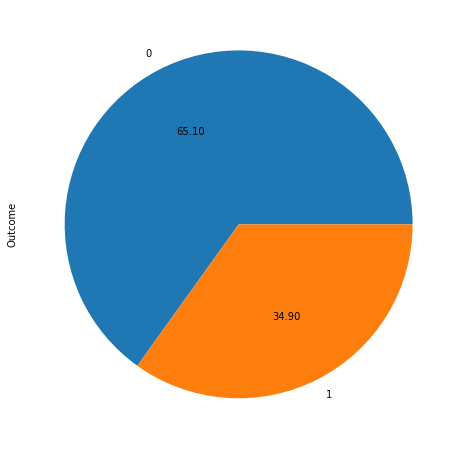

In [67]:
data['Outcome'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%.2f')

0 = tidak mempunyai diabetes
1 = mempunyai diabetes

Terlihat dari diagram di atas pasien yang mnderita diabetes 34.90% atau sebanyak 265 dan yang tidak menderita diabetes ada 65.10% atau sebanyak 500.

In [68]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

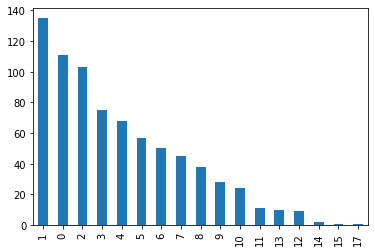

In [122]:
data['Pregnancies'].value_counts().plot(kind='bar')

Berdasarkan diagram riwayat kehamilan paling banyak adalah yang hamil 1 kali, paling sedikit hamil 17 kali.

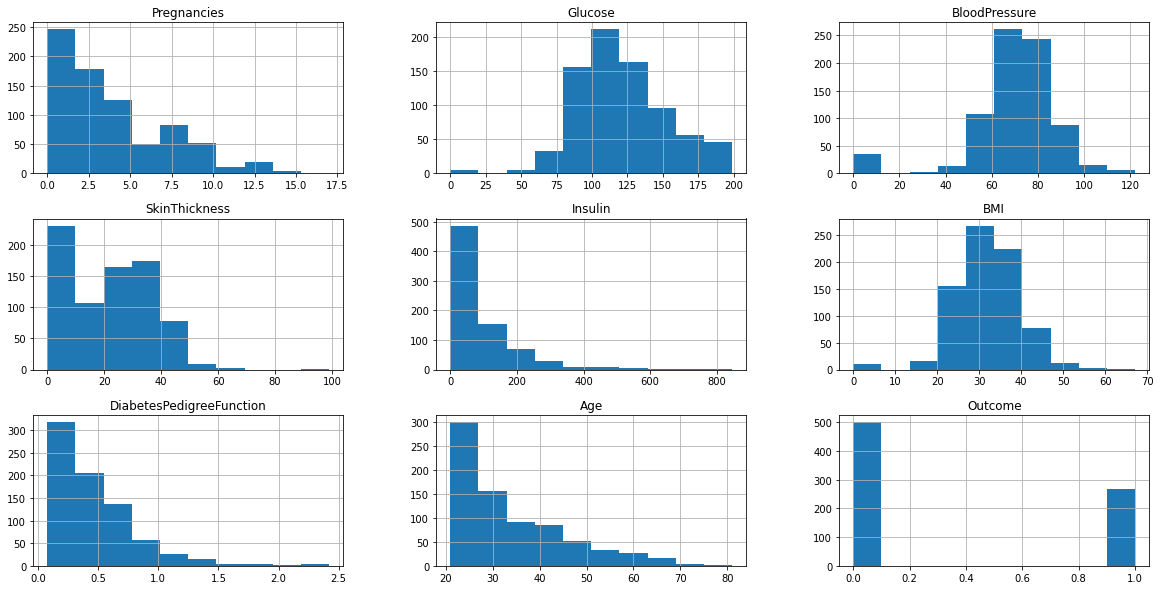

In [69]:
data.hist(figsize=(20,10))
plt.show()

* Pregnancies : terlihat bahwa pasien banyak yang tidak hamil ditunjukkan dengan tingginya pada angka 0.
* Glucose : rata-rata pasien memiliki kadar gula normal.
* Blood Pressure : Terlihat bahwa tekanan darah para pasien masih banyak yg tidak sesuai dengan anka normalnya.
* Skin Thickness : sebagian besar pasien memiliki ketebalan kulit yg tidak sesuai.
* BMI : Terlihat bahwa rata-rata BMI sebesar 30.
* Diabetes Pedigree function : Hanya sedikit yg mendapaatkan penyakit diabetes dari keturunan.
* Age : Rentang usia 20 - 25 lebih dominan.

In [70]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* Pregnancies : Rata-rata kehamilan sebanyak 4 kali, dengan yang tertinggi 17 kali kehamilan.
* Glucose : Kemampuan menyerap zat gula paling rendah adalah 0 mg/dL atau tidak sama sekali dan paling tinggi adalah 199 mg/dL.
* BloodPressure : Rata-rata pasien memiliki tekanan darah 69 mmHg. Tekanan memompa darah keseluruh tubuh paling rendah adalah 0 mmHg atau tidak sama sekali dan paling tinggi adalah 122 mmHg.
* SkinThickness : Ketebalan lipatan kulit rata-rata adalah 20mm. Ketebalan paling tinggi adalah 99 mm.
* Insulin : Rata-rata pasien suntik insulin sebesar 80 muU/ml, paling tinggi 846 muU/ml.
* BMI : Pengukuran untuk menentukan golongan berat badan sehat paling tertinggi adalah 67.
* DiabetesPedigreeFunction : Pasien yang menderit adiabetes dari genetik paling rendah 0.07 dan yang paling tinggi 2.42.
* Age : Usia pasien rata-rata 33 tahun. Paling muda 21 tahun dan paling tua 81 tahun.

# 5 - Data Processing

In [71]:
# Get Data for Model Inference

data_inf = data.sample(20, random_state=26)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
355,9,165,88,0,0,30.4,0.302,49,1
123,5,132,80,0,0,26.8,0.186,69,0
551,3,84,68,30,106,31.9,0.591,25,0
586,8,143,66,0,0,34.9,0.129,41,1
114,7,160,54,32,175,30.5,0.588,39,1
587,6,103,66,0,0,24.3,0.249,29,0
248,9,124,70,33,402,35.4,0.282,34,0
525,3,87,60,18,0,21.8,0.444,21,0
489,8,194,80,0,0,26.1,0.551,67,0
717,10,94,72,18,0,23.1,0.595,56,0


In [72]:
data_inf.shape

(20, 9)

In [73]:
# Remove Inference-Set from Dataset

data_train_test = data.drop(data_inf.index)
data_train_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [74]:
# Reset Index (meminimalisir error)

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,165,88,0,0,30.4,0.302,49,1
1,5,132,80,0,0,26.8,0.186,69,0
2,3,84,68,30,106,31.9,0.591,25,0
3,8,143,66,0,0,34.9,0.129,41,1
4,7,160,54,32,175,30.5,0.588,39,1
5,6,103,66,0,0,24.3,0.249,29,0
6,9,124,70,33,402,35.4,0.282,34,0
7,3,87,60,18,0,21.8,0.444,21,0
8,8,194,80,0,0,26.1,0.551,67,0
9,10,94,72,18,0,23.1,0.595,56,0


Reset index untuk mengurutkan indexnya agar tidak terjadi error.

## Handling Missing Value

In [75]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Tidak terdapat missing value pada dataset.

## Splitting Dataset

In [76]:
# Split between `X` (Features) and `y` (Target)

X = data_train_test.drop('Outcome', axis=1)
y = data_train_test['Outcome']

In [77]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (598, 8)
Test Size  :  (150, 8)


In [78]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

## Handling Outlier

In [79]:
# Function to create histogram and boxplot.
# Function takes a dataframe (df) and the variable of interest as arguments

def diagnostic_plots(data, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[variable])
    plt.title('Boxplot')

    plt.show()

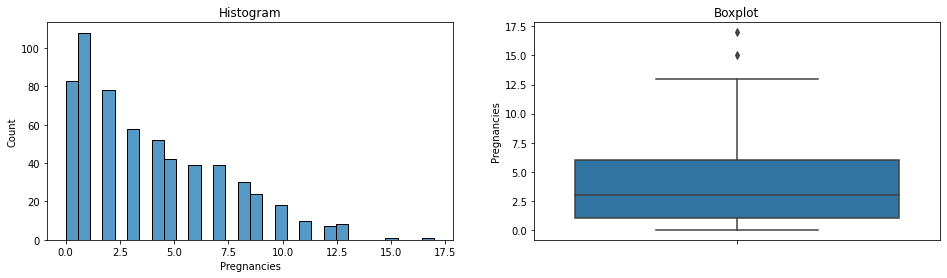


Skewness Value Pregnancies :  0.8640206132811625


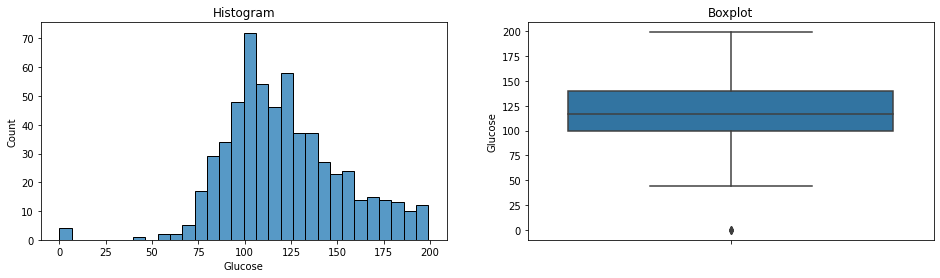


Skewness Value Glucose :  0.15352921777672007


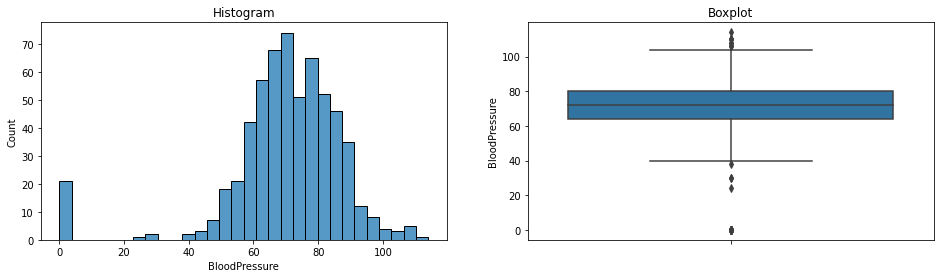


Skewness Value BloodPressure :  -1.8094025862647463


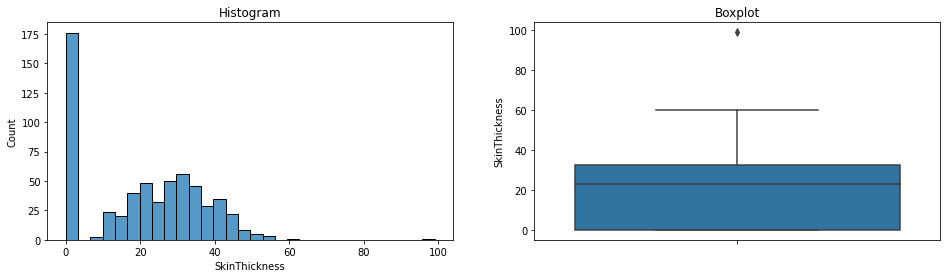


Skewness Value SkinThickness :  0.13700157451541442


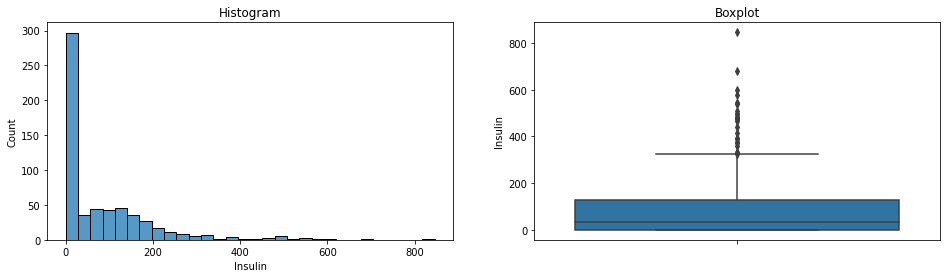


Skewness Value Insulin :  2.2202665014643035


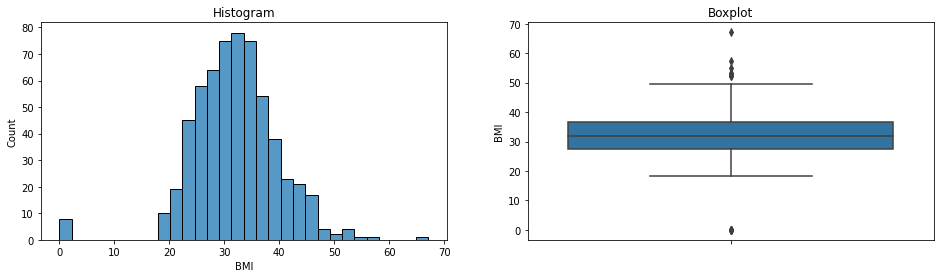


Skewness Value BMI :  -0.35473438196305906


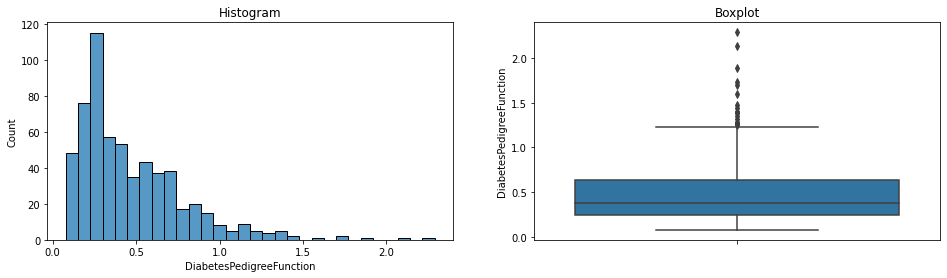


Skewness Value DiabetesPedigreeFunction :  1.650395998948963


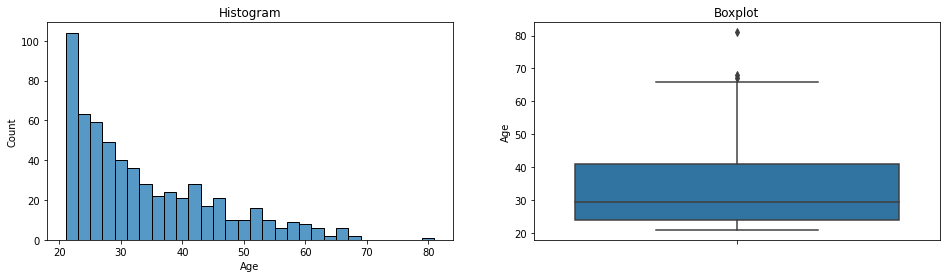


Skewness Value Age :  1.0517118438837934


In [80]:
diagnostic_plots(X_train, 'Pregnancies')
print('\nSkewness Value Pregnancies : ', X_train['Pregnancies'].skew())

diagnostic_plots(X_train, 'Glucose')
print('\nSkewness Value Glucose : ', X_train['Glucose'].skew())

diagnostic_plots(X_train, 'BloodPressure')
print('\nSkewness Value BloodPressure : ', X_train['BloodPressure'].skew())

diagnostic_plots(X_train, 'SkinThickness')
print('\nSkewness Value SkinThickness : ', X_train['SkinThickness'].skew())

diagnostic_plots(X_train, 'Insulin')
print('\nSkewness Value Insulin : ', X_train['Insulin'].skew())

diagnostic_plots(X_train, 'BMI')
print('\nSkewness Value BMI : ', X_train['BMI'].skew())

diagnostic_plots(X_train, 'DiabetesPedigreeFunction')
print('\nSkewness Value DiabetesPedigreeFunction : ', X_train['DiabetesPedigreeFunction'].skew())

diagnostic_plots(X_train, 'Age')
print('\nSkewness Value Age : ', X_train['Age'].skew())

In [81]:
# Create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
windsoriser.fit(X_train)

X_train_cleaned = windsoriser.transform(X_train)

In [82]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'Pregnancies': -6.5, 'Glucose': 40.0, 'BloodPressure': 40.0, 'SkinThickness': -49.125, 'Insulin': -195.0, 'BMI': 13.787499999999994, 'DiabetesPedigreeFunction': -0.356375, 'Age': -1.5}
Right Tail Caps :  {'Pregnancies': 13.5, 'Glucose': 200.0, 'BloodPressure': 104.0, 'SkinThickness': 81.875, 'Insulin': 325.0, 'BMI': 50.087500000000006, 'DiabetesPedigreeFunction': 1.236625, 'Age': 66.5}


In [83]:
X_train_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
644,8.0,167.0,104.0,46.0,231.0,37.6,0.165,43.0
418,1.0,181.0,64.0,30.0,180.0,34.1,0.328,38.0
565,10.0,133.0,68.0,0.0,0.0,27.0,0.245,36.0
48,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0
201,8.0,196.0,76.0,29.0,280.0,37.5,0.605,57.0
...,...,...,...,...,...,...,...,...
406,1.0,143.0,74.0,22.0,61.0,26.2,0.256,21.0
390,0.0,131.0,66.0,40.0,0.0,34.3,0.196,22.0
143,9.0,57.0,80.0,37.0,0.0,32.8,0.096,41.0
241,10.0,122.0,68.0,0.0,0.0,31.2,0.258,41.0


## Feature Selection

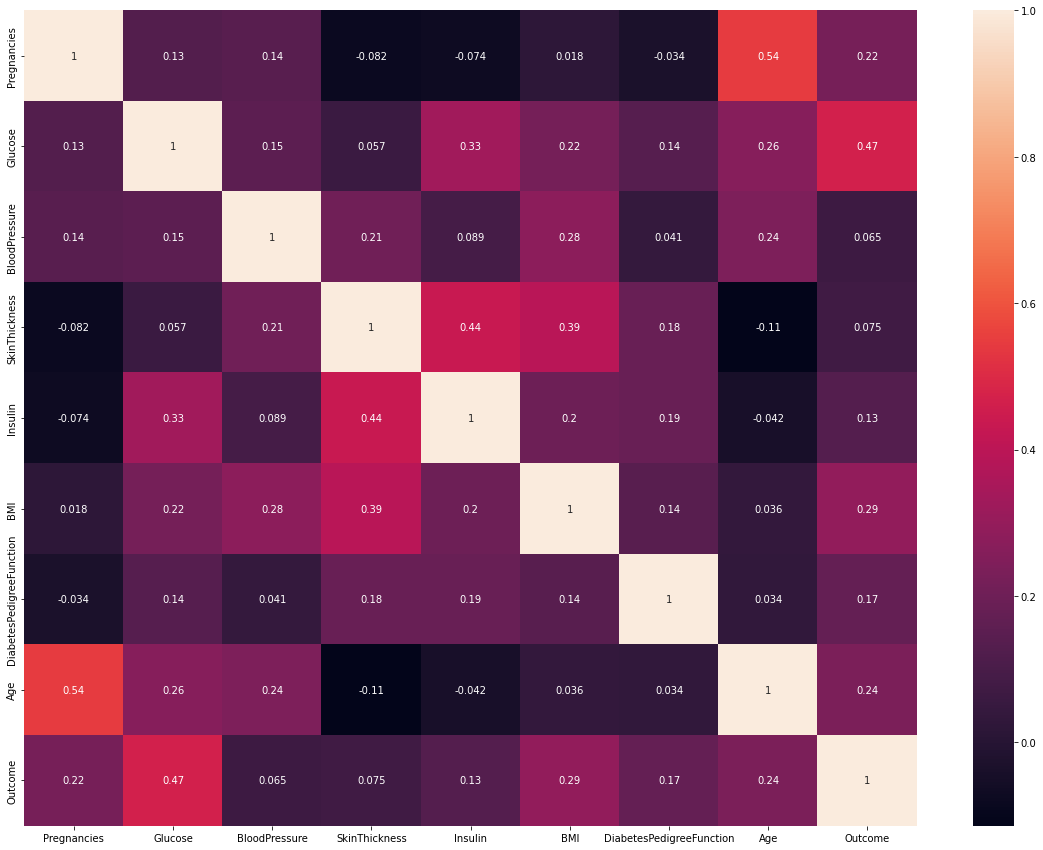

In [84]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

Pada heatmap di atas terlihat semua fitur berkolerasi positif terhadap outcome, maka saya memilih semua fitur.

## Split between Numerical Columns and Categorical Columns

In [85]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train_cleaned.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train_cleaned.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Categorical Columns :  []


In [86]:
# Split Train-Set and Test-Set based on Column Types

X_train_num = X_train_cleaned[num_columns]

X_test_num = X_test[num_columns]

## Feature Scaling

In [87]:
# Feature Scaling using MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_scaled = scaler.transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)

# 6 - Model Definition

## Logistic Regression

In [88]:
pipe_logreg = Pipeline([
    ('LogRegScale', StandardScaler()),
    ('LogReg', LogisticRegression())
])

In [89]:
log_reg = cross_val_score(pipe_logreg, X_train_scaled, y_train, cv=5)

print("Cross Validation array           :",log_reg)
print("Best Cross Validation score      :",log_reg.mean())
print("Standar Deviasi Cross Validation :",log_reg.std())

Cross Validation array           : [0.69166667 0.79166667 0.78333333 0.83193277 0.7394958 ]
Best Cross Validation score      : 0.7676190476190476
Standar Deviasi Cross Validation : 0.04800242362070422


Logistic regression memiliki nilai cross validation sebear 76.7% dan standar deviasi cross validation sebesar 0.048.

## Decision Tree

In [90]:
pipe_dt = Pipeline([
    ('DTScale', StandardScaler()),
    ('DTC', DecisionTreeClassifier())
])

In [91]:
DT = cross_val_score(pipe_dt, X_train_scaled, y_train, cv=5)

print("Cross Validation array           :",DT)
print("Best Cross Validation score      :",DT.mean())
print("Standar Deviasi Cross Validation :",DT.std())

Cross Validation array           : [0.65       0.73333333 0.75       0.70588235 0.63865546]
Best Cross Validation score      : 0.6955742296918768
Standar Deviasi Cross Validation : 0.044296564862042705


Decission tree memiliki nilai cross validation sebesar 70.5% dan standar deviasi cross validation sebesar 0.0547.

## Random Forest

In [92]:
pipe_rf = Pipeline([
    ('RFScale', StandardScaler()),
    ('RFC', RandomForestClassifier())
])

In [93]:
RF = cross_val_score(pipe_rf, X_train_scaled, y_train, cv=5)

print("Cross Validation array           :",RF)
print("Best Cross Validation score      :",RF.mean())
print("Standar Deviasi Cross Validation :",RF.std())

Cross Validation array           : [0.73333333 0.775      0.78333333 0.84033613 0.67226891]
Best Cross Validation score      : 0.7608543417366948
Standar Deviasi Cross Validation : 0.05590625212925891


Random forest memiliki nilai cross validation sebear 76.08% dan standar deviasi cross validation sebesar 0.0559.

## KNN

In [94]:
pipe_knn = Pipeline([
    ('KNNScale', StandardScaler()),
    ('KNN', KNeighborsClassifier())
])

In [95]:
KNN = cross_val_score(pipe_knn, X_train_scaled, y_train, cv=5)

print("Cross Validation array           :",KNN)
print("Best Cross Validation score      :",KNN.mean())
print("Standar Deviasi Cross Validation :",KNN.std())

Cross Validation array           : [0.74166667 0.76666667 0.75       0.72268908 0.67226891]
Best Cross Validation score      : 0.7306582633053221
Standar Deviasi Cross Validation : 0.03244909136406315


KNN memiliki nilai cross validation sebear 73.06% dan standar deviasi cross validation sebesar 0.0324.

# 7 - Model Training

## Logistic Regression

In [96]:
model_logreg = pipe_logreg.fit(X_train_scaled, y_train)

## Decision Tree

In [97]:
model_dt = pipe_dt.fit(X_train_scaled, y_train)

## Random Forest

In [98]:
model_rf = pipe_rf.fit(X_train_scaled, y_train)

## KNN

In [99]:
model_knn = pipe_knn.fit(X_train_scaled, y_train)

## Hyperparameter Tuning

Berdasarkan nilai cross validation logistic regression yang bernilai 76.7% maka merupakan algoritma terbaik, sehingga dilakukan hyperparameter tuning.

In [100]:
param_grid_logreg = {"LogReg__C": [1.0, 2.0],
                     "LogReg__random_state": [26]
                     }

In [101]:
grid_logreg = GridSearchCV(pipe_logreg, param_grid_logreg, cv=5)
grid_logreg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('LogRegScale', StandardScaler()),
                                       ('LogReg', LogisticRegression())]),
             param_grid={'LogReg__C': [1.0, 2.0], 'LogReg__random_state': [26]})

In [102]:
grid_logreg.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_logreg.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_logreg.best_score_))
print("Standar Deviasi cross-validation score: {:.2f}".format(grid_logreg.best_score_.std()))

Best parameters: {'LogReg__C': 1.0, 'LogReg__random_state': 26}
Best cross-validation score: 0.77
Standar Deviasi cross-validation score: 0.00


In [103]:
model_logreg_grid = grid_logreg.best_estimator_
model_logreg_grid

Pipeline(steps=[('LogRegScale', StandardScaler()),
                ('LogReg', LogisticRegression(random_state=26))])

Sudah di lakukan Grid Search terhadap model terbaik. Hyperparameter logistic regression adalah C = 1. Sebelumnya score cross validationnya adalah 76.7% dengan std 0.048, setelah menggunakan best estimator C = 1 score cross validationnya menjadi 77%% dan stdnya 0.00. Berdasarkan hasil tersebut, bahwa model LogReg Grid Search CV lebih baik.

In [104]:
y_pred_train = grid_logreg.predict(X_train_scaled)
y_pred_test = grid_logreg.predict(X_test_scaled)

In [105]:
print('Classification Report (Data Train)')
print('---------------------------------------------\n')
print(classification_report(y_train, y_pred_train))
print('Classification Report (Data Test)')
print('---------------------------------------------\n')
print(classification_report(y_test, y_pred_test))

Classification Report (Data Train)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       385
           1       0.73      0.59      0.65       213

    accuracy                           0.78       598
   macro avg       0.76      0.74      0.75       598
weighted avg       0.77      0.78      0.77       598

Classification Report (Data Test)
---------------------------------------------

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       102
           1       0.62      0.50      0.55        48

    accuracy                           0.74       150
   macro avg       0.70      0.68      0.68       150
weighted avg       0.73      0.74      0.73       150



Pada pasien yang tidak menderita diabetes (0), Yang menderita diabetes (1). 

Pada classification report y_train recall 0 0.88, recall 1 0.59. Pasien yang tidak menderita diabetes sebesar 88% dan yang menderita sebesar 59%. Secara keseluruhan memiliki akurasi 78% dari 598 sample.

Pada classification report y_test recall 0 0.85, recall 1 0.50. Pasien yang tidak menderita diabetes sebesar 85% dan yang menderita sebesar 50%. Secara keseluruhan memiliki akurasi 74% dari 150 sample.


# 8 - Model Evaluation

## Logistic Regression

In [106]:
y_pred_train_logreg = model_logreg.predict(X_train_scaled)
y_pred_test_logreg = model_logreg.predict(X_test_scaled)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_logreg))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_logreg))

accuracy score train :  0.7775919732441472
accuracy score test :  0.74


Ketepatan model accuracy score train sebesar 77.7% dan accuracy score test sebesar 74%. Hal ini menunjukkan bahwa model Logreg Goodfit, yang berarti bahwa model tersebut baik dalam memprediksi hasil diagnostik.

## Decision Tree

In [107]:
y_pred_train_dt = model_dt.predict(X_train_scaled)
y_pred_test_dt = model_dt.predict(X_test_scaled)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_dt))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_dt))

accuracy score train :  1.0
accuracy score test :  0.6933333333333334


Ketepatan model accuracy score train sebesar 100% dan accuracy score test sebesar 70%. Hal ini menunjukkan bahwa model Deccision Tree Underfit, yang berarti bahwa model tersebut tidak baik dalam memprediksi hasil diagnostik.

## Random Forest

In [108]:
y_pred_train_rf = model_rf.predict(X_train_scaled)
y_pred_test_rf = model_rf.predict(X_test_scaled)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_rf))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_rf))

accuracy score train :  1.0
accuracy score test :  0.7066666666666667


Ketepatan model accuracy score train sebesar 100% dan accuracy score test sebesar 72.6%. Hal ini menunjukkan bahwa model Random Forest Underfit, yang berarti bahwa model tersebut tidak baik dalam memprediksi hasil diagnostik.

## KNN

In [109]:
y_pred_train_knn = model_knn.predict(X_train_scaled)
y_pred_test_knn = model_knn.predict(X_test_scaled)
print('accuracy score train : ',accuracy_score(y_train,y_pred_train_knn))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test_knn))

accuracy score train :  0.8377926421404682
accuracy score test :  0.7266666666666667


Ketepatan model accuracy score train sebesar 83.7% dan accuracy score test sebesar 72.6%. Hal ini menunjukkan bahwa model KNN Goodfit, yang berarti bahwa model tersebut baik dalam memprediksi hasil diagnostik.

# 9 - Model Saving

In [110]:
import pickle

with open ('model_logreg.pkl','wb') as model_file:
  pickle.dump(model_logreg_grid, model_file)

# 10 - Model Inference

In [111]:
# Display Inference-Set

data_inf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,165,88,0,0,30.4,0.302,49,1
1,5,132,80,0,0,26.8,0.186,69,0
2,3,84,68,30,106,31.9,0.591,25,0
3,8,143,66,0,0,34.9,0.129,41,1
4,7,160,54,32,175,30.5,0.588,39,1
5,6,103,66,0,0,24.3,0.249,29,0
6,9,124,70,33,402,35.4,0.282,34,0
7,3,87,60,18,0,21.8,0.444,21,0
8,8,194,80,0,0,26.1,0.551,67,0
9,10,94,72,18,0,23.1,0.595,56,0


In [112]:
# Split between Numerical Columns and Categorical Columns 

data_inf_num = data_inf[num_columns]

In [113]:
# Feature Scaling and Feature Encoding

data_inf_final = scaler.transform(data_inf_num)

## Logistic Regression

In [114]:
y_pred_inf_logreg = model_logreg.predict(data_inf_final)
y_pred_inf_logreg_final = pd.DataFrame(y_pred_inf_logreg, columns=['LogReg- Prediction'])
y_pred_inf_logreg_final

,LogReg- Prediction
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [115]:
y_pred_inf_logreg_grid = model_logreg_grid.predict(data_inf_final)
y_pred_inf_logreg_grid_final = pd.DataFrame(y_pred_inf_logreg_grid, columns=['LogReg GridSearchCV - Prediction'])
y_pred_inf_logreg_grid_final

,LogReg GridSearchCV - Prediction
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


## Decision Tree

In [116]:
y_pred_inf_dt = model_dt.predict(data_inf_final)
y_pred_inf_dt_final = pd.DataFrame(y_pred_inf_dt, columns=['DecisionTree - Prediction'])
y_pred_inf_dt_final

,DecisionTree - Prediction
0,1
1,1
2,0
3,1
4,1
5,0
6,1
7,0
8,1
9,0


## Random Forest

In [117]:
y_pred_inf_rf = model_rf.predict(data_inf_final)
y_pred_inf_rf_final = pd.DataFrame(y_pred_inf_rf, columns=['RandomForest - Prediction'])
y_pred_inf_rf_final

,RandomForest - Prediction
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


## KNN

In [118]:
y_pred_inf_knn = model_knn.predict(data_inf_final)
y_pred_inf_knn_final = pd.DataFrame(y_pred_inf_knn, columns=['KNN - Prediction'])
y_pred_inf_knn_final

,KNN - Prediction
0,1
1,0
2,0
3,1
4,1
5,0
6,1
7,0
8,0
9,0


In [119]:
y_pred_inf_logreg_grid = model_logreg_grid.predict(data_inf_final)
y_pred_inf_logreg_grid_final = pd.DataFrame(y_pred_inf_logreg_grid, columns=['LogReg GridSearchCV - Prediction'])
y_pred_inf_logreg_grid_final

,LogReg GridSearchCV - Prediction
0,1
1,0
2,0
3,1
4,1
5,0
6,0
7,0
8,1
9,0


In [120]:
pd.concat([data_inf, y_pred_inf_logreg_final, y_pred_inf_logreg_grid_final, y_pred_inf_dt_final, y_pred_inf_rf_final, y_pred_inf_knn_final], axis=1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,LogReg- Prediction,LogReg GridSearchCV - Prediction,DecisionTree - Prediction,RandomForest - Prediction,KNN - Prediction
0,9,165,88,0,0,30.4,0.302,49,1,1,1,1,1,1
1,5,132,80,0,0,26.8,0.186,69,0,0,0,1,0,0
2,3,84,68,30,106,31.9,0.591,25,0,0,0,0,0,0
3,8,143,66,0,0,34.9,0.129,41,1,1,1,1,1,1
4,7,160,54,32,175,30.5,0.588,39,1,1,1,1,1,1
5,6,103,66,0,0,24.3,0.249,29,0,0,0,0,0,0
6,9,124,70,33,402,35.4,0.282,34,0,0,0,1,0,1
7,3,87,60,18,0,21.8,0.444,21,0,0,0,0,0,0
8,8,194,80,0,0,26.1,0.551,67,0,1,1,1,1,0
9,10,94,72,18,0,23.1,0.595,56,0,0,0,0,0,0


Terlihat hasil prediction menggunakan model terbaik hasilnya sudah cukup baik namun masih ada yang salah prediksi.

# 11 - Kesimpulan

EDA
* Terlihat dari diagram di atas pasien yang mnderita diabetes 34.90% atau sebanyak 265 dan yang tidak menderita diabetes ada 65.10% atau sebanyak 500.
* Berdasarkan diagram riwayat kehamilan paling banyak adalah yang hamil 1 kali, paling sedikit hamil 17 kali.
* Pregnancies : terlihat bahwa pasien banyak yang tidak hamil ditunjukkan dengan tingginya pada angka 0.
* Glucose : rata-rata pasien memiliki kadar gula normal.
* Blood Pressure : Terlihat bahwa tekanan darah para pasien masih banyak yg tidak sesuai dengan anka normalnya.
* Skin Thickness : sebagian besar pasien memiliki ketebalan kulit yg tidak sesuai.
* BMI : Terlihat bahwa rata-rata BMI sebesar 30.
* Diabetes Pedigree function : Hanya sedikit yg mendapaatkan penyakit diabetes dari keturunan.
* Age : Rentang usia 20 - 25 lebih dominan.

---

* Berdasarkan nilai cross validation logistic regression yang bernilai 76.7% maka merupakan algoritma terbaik, sehingga dilakukan hyperparameter tuning. Sudah di lakukan Grid Search terhadap model terbaik. Hyperparameter logistic regression adalah C = 1. Sebelumnya score cross validationnya adalah 76.7% dengan std 0.048, setelah menggunakan best estimator C = 1 score cross validationnya menjadi 77% dan stdnya 0.00. Berdasarkan hasil tersebut, bahwa model LogReg Grid Search CV lebih baik.

* Pada pasien yang tidak menderita diabetes (0), Yang menderita diabetes (1). Pada classification report y_train recall 0 0.88, recall 1 0.59. Pasien yang tidak menderita diabetes sebesar 88% dan yang menderita sebesar 59%. Secara keseluruhan memiliki akurasi 78% dari 598 sample. Pada classification report y_test recall 0 0.85, recall 1 0.50. Pasien yang tidak menderita diabetes sebesar 85% dan yang menderita sebesar 50%. Secara keseluruhan memiliki akurasi 74% dari 150 sample.

